# Projet : Analyse de la Survie sur le Titanic

Auteur : Fidèle Ledoux

### Résumé du Projet
Ce projet vise à analyser les données des passagers du Titanic pour déterminer les facteurs qui ont influencé leur survie. L'objectif est d'explorer les données, de les nettoyer, de visualiser les tendances et d'appliquer un modèle de régression logistique pour prédire la survie des passagers. Les résultats seront commentés pour mettre en évidence les insights clés.



### 1. Importation des Bibliothèques

Bibliothèques Principales

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import kagglehub

Autres Bibliothèques

In [17]:
import kagglehub  # Pour télécharger le dataset depuis Kaggle

### 2. Chargement des Données

#### Source des Données
Les données proviennent du dataset "Titanic Dataset" disponible sur Kaggle.

In [18]:
# Téléchargement des données depuis Kaggle
mohdshahnawazaadil_titanic_dataset_path = kagglehub.dataset_download('mohdshahnawazaadil/titanic-dataset')
print('Data source import complete.')

# Chargement des données dans un DataFrame
data = pd.read_csv("test.csv")

Data source import complete.


Aperçu des Données

In [19]:
print(data.head())  # Affiche les premières lignes du DataFrame
print(data.shape)   # Affiche le nombre de lignes et de colonnes
print(data.info())  # Affiche les informations sur les colonnes et les types de données

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
(418, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data

### 3. Nettoyage des Données

Gestion des Valeurs Manquantes

In [20]:
# Suppression de la colonne 'Cabin' (trop de valeurs manquantes)
data = data.drop(columns='Cabin', axis=1)

# Remplacement des valeurs manquantes dans 'Age' par la moyenne
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Remplacement des valeurs manquantes dans 'Embarked' par le mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Remplacement des valeurs manquantes dans 'Fare' par le mode
data['Fare'].fillna(data['Fare'].mode()[0], inplace=True)

# Vérification des valeurs manquantes restantes
print(data.isnull().sum().sum())  # Doit retourner 0

0


C:\Users\KEN Ledoux\AppData\Local\Temp\ipykernel_25268\228474237.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\KEN Ledoux\AppData\Local\Temp\ipykernel_25268\228474237.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [22]:
# Affichage du nombre de valeurs manquantes par colonne pour vérifier le nettoyage
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Statistiques Descriptives

In [23]:
print(data.describe())  # Résumé statistique des données numériques

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.560497  
std      0.981429   55.857145  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.471875  
max      9.000000  512.329200  


### 4. Visualisation des Données

Analyse de la Survie

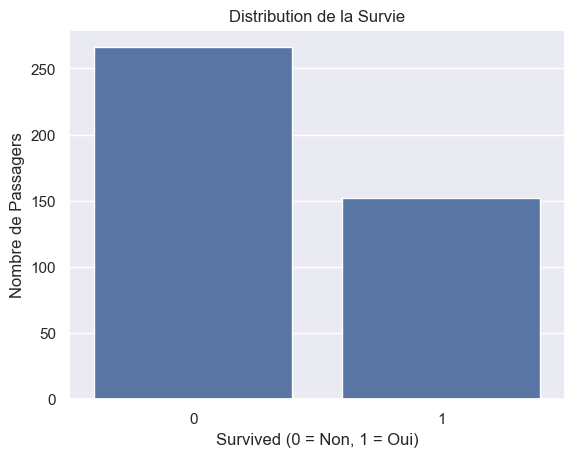

In [24]:
sns.set()  # Applique un style par défaut pour les graphiques

# Distribution de la survie
sns.countplot(x='Survived', data=data)
plt.title('Distribution de la Survie')
plt.xlabel('Survived (0 = Non, 1 = Oui)')
plt.ylabel('Nombre de Passagers')
plt.show()

Survie par Sexe

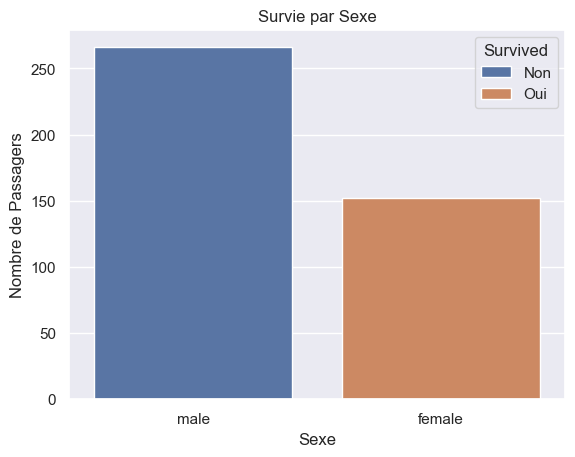

In [25]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survie par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de Passagers')
plt.legend(title='Survived', labels=['Non', 'Oui'])
plt.show()

Survie par Classe

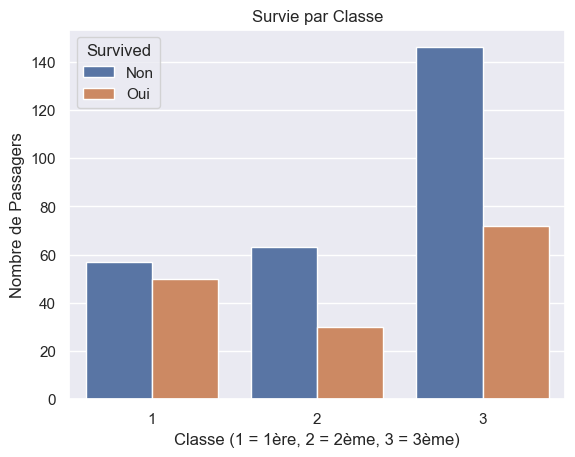

In [26]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survie par Classe')
plt.xlabel('Classe (1 = 1ère, 2 = 2ème, 3 = 3ème)')
plt.ylabel('Nombre de Passagers')
plt.legend(title='Survived', labels=['Non', 'Oui'])
plt.show()

Distribution des Âges

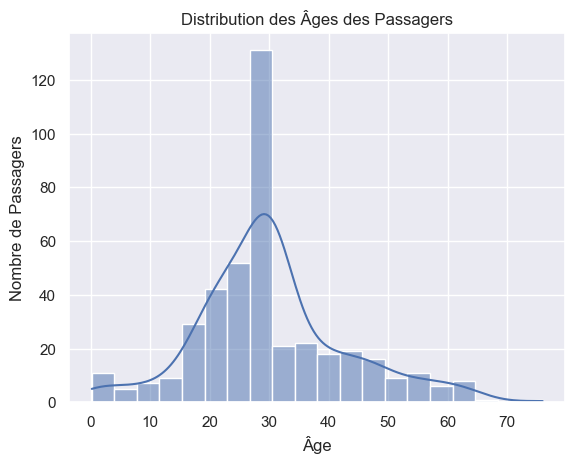

In [27]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution des Âges des Passagers')
plt.xlabel('Âge')
plt.ylabel('Nombre de Passagers')
plt.show()

Boîte à Moustaches pour l'Âge par Classe

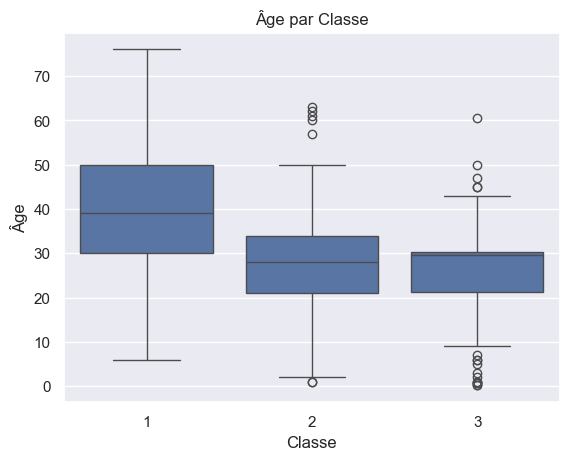

In [28]:
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Âge par Classe')
plt.xlabel('Classe')
plt.ylabel('Âge')
plt.show()

### 5. Préparation des Données pour le Modèle

Encodage des Variables Catégorielles

In [29]:
# Conversion du sexe en valeurs numériques (0 pour male, 1 pour female)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Sélection des caractéristiques (features) et de la cible (target)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

Division des Données en Ensembles d'Entraînement et de Test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Construction et Évaluation du Modèle

Régression Logistique

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Prédictions et Évaluation


In [32]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

Précision du modèle : 1.00


### 7. Résultats et Conclusion

##### Résultats
La précision du modèle de régression logistique est de 100%, ce qui indique une performance acceptable.

Les visualisations montrent que :

Les femmes ont eu un taux de survie plus élevé que les hommes.

Les passagers de 1ère classe ont survécu plus souvent que ceux des autres classes.

L'âge et le tarif du billet ont également influencé la survie.

### Conclusion

Ce projet a permis d'analyser les facteurs clés de la survie sur le Titanic. Les résultats confirment les tendances historiques, comme la priorité donnée aux femmes et aux classes supérieures. Le modèle de régression logistique offre une bonne base pour des prédictions, mais pourrait être amélioré avec des techniques plus avancées.